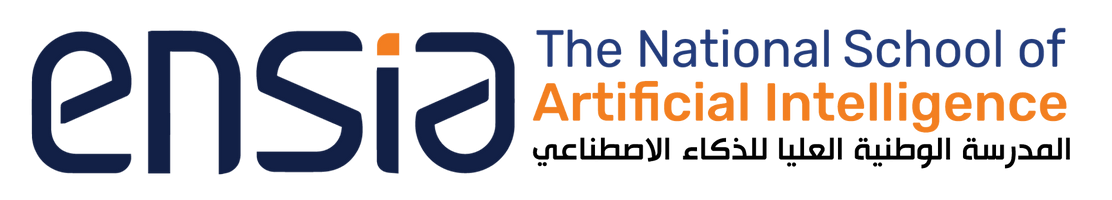

---
# **Introduction to Artificial Intelligence**

> ## Lab 7 (Week 8 & Week 9) --Search Algorithms: Part 3___*Local Search*

## Overview:
> - In previous labs, you worked on search strategies that explore the **entire state space** (e.g., BFS, DFS, UCS, A*).
> - In this lab, we begin working with **Local Search Algorithms**, which operate differently:
  - Local search is a heuristic optimization method that starts from a (often random) candidate solution and repeatedly makes small local changes—moving to neighboring solutions with better evaluations—until no further improvements can be found.
  - They do **not maintain a full search tree or queue**.
  - These algorithms are especially useful for **combinatorial problems** like constraint satisfaction and route optimization.

> This lab explores two variants of local search: **Steepest Ascent** and **Stochastic Hill Climbing**. we explore the power of local search algorithms by applying them to two classic AI problems:

  - **The Traveling Salesman Problem (TSP)**, where the objective is to find the shortest possible route in a complete graph (all nodes are connacted to each other) that visits a set of cities exactly once and returns to the starting city.

  - **The 8-Queens Problem**, which involves placing eight queens on a chessboard such that no two queens threaten each other.

## Objectives
> - **Formulate Problems as Local Search:**
In this lab, you will adapt two well-known problems—Traveling Salesman Planning (TSP) and the 8-Queens Problem—to fit the local search formulation.

> - **Implement Local Search Strategies:**
  - **Steepest Ascent Hill Climbing:** Always selects the neighbor with the highest improvement in the objective function; may quickly reach a local optimum.
  - **Stochastic Hill Climbing (HC)**: Selects randomly among better neighbors, introducing variability to help escape small local optima.

## 🛠️ Your Tasks:
### ✅ 1. Complete the following methods:

> - Complete the Traveling Salesperson Problem class.
> - Complete the Eight Queens Problem class.
> - Complete _steepest_ascent_search method.


### ✅ 2. Run the Provided Tests:

> Test your implementation on both:
> - `queens_problem` (for 8-Queens)
> - `tsp_problem` (for TSP)


### ✅ 3.  Analyze the Results:**
- Compare the outputs across different strategies to understand their performance.
- Verify that each strategy is exploring the state space as intended and converges on a valid solution.

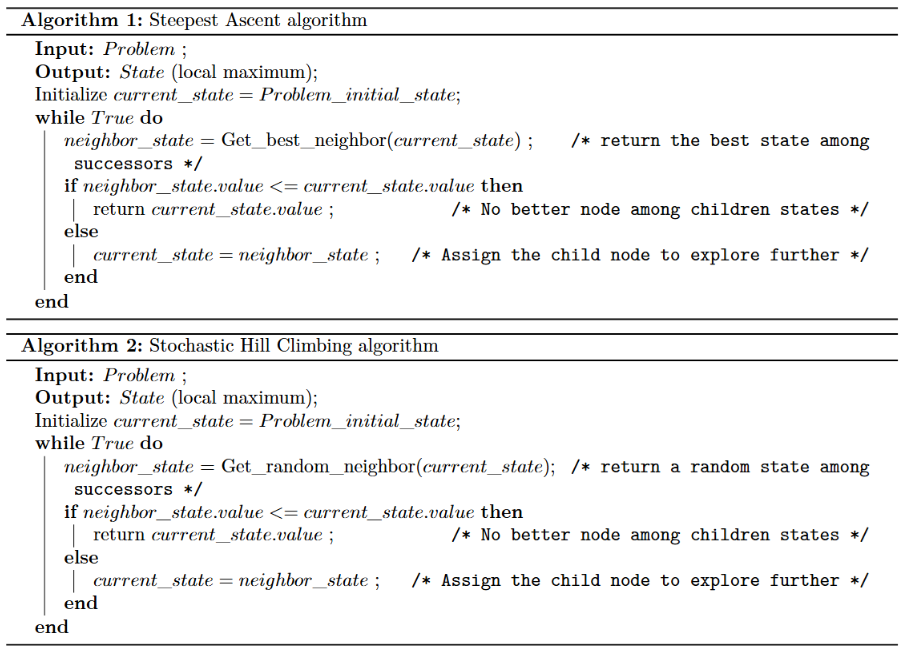

In [ ]:
import random
import math
import copy

# ------------------------------------------------------------------------------
# Candidate Class: Represents a potential solution state and its evaluation
# ------------------------------------------------------------------------------
class Candidate:
    """
    Represents a candidate solution in a local search context.

    Attributes:
        state: The specific configuration of the solution (e.g., a tour permutation, queen positions).
        value: The evaluation score of the state (lower is generally better in minimization problems).
    """
    def __init__(self, state, value):
        self.state = state
        self.value = value

    def __repr__(self):
        # Provides a clear string representation of the candidate object
        # Truncate long states for readability
        state_repr = str(self.state)
        if len(state_repr) > 50:
            state_repr = state_repr[:47] + "..."
        return f"Candidate(state={state_repr}, value={self.value})"

# ------------------------------------------------------------------------------
# Problem Interface (Conceptual)
# Any problem used with these search algorithms should ideally provide:
#   - initial_state: A starting candidate solution state.
#   - evaluate(state): A function to calculate the cost/value of a given state.
#   - generate_neighbors(state): A function to produce neighboring states from a given state.
#   - (Optional) A way to generate a new random initial state.
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# Traveling Salesperson Problem (TSP) Implementation
# ------------------------------------------------------------------------------
class TSPProblem:
    """
    Represents the Traveling Salesperson Problem.

    Finds the shortest tour visiting all cities exactly once and returning to the start.
    Assumes a complete graph where travel between any two cities is possible.

    Attributes:
        cities (dict): Maps city names to (x, y) coordinates.
        city_list (list): An ordered list of city names.
        initial_state (list): A randomly generated initial tour (permutation of cities).
    """
    def __init__(self, cities):
        """
        Initializes the TSP problem.

        Args:
            cities (dict): A dictionary mapping city names to coordinates.
                           Example: {'A': (0, 0), 'B': (1, 5), ...}
        """
        if not cities:
            raise ValueError("City dictionary cannot be empty.")
        self.cities = cities
        self.city_list = list(cities.keys())
        # Generate a random initial tour upon initialization
        self.initial_state = self._generate_random_state()

    def _generate_random_state(self):
        """
        Generates a new random tour (permutation of cities).

        Returns:
            list: A random permutation of city names.

        Example:
            >>> self.city_list = ['A', 'B', 'C']
            >>> problem._generate_random_state()
            ['B', 'C', 'A']
        """
        # TODO: Copy self.city_list, shuffle it, and return the new list
        pass

    def evaluate(self, state):
        """
        Calculates the total length of a given tour (state).

        Uses Euclidean distance and treats the tour as cyclic.

        Args:
            state (list): A permutation of city names representing the tour.

        Returns:
            float: The total distance (cost) of the tour.

        Example:
            >>> cities = {'A': (0,0), 'B': (3,4)}
            >>> problem = TSPProblem(cities)
            >>> problem.evaluate(['A', 'B'])
            10.0
        """
        # TODO: Handle edge cases (len(state) < 2)
        # TODO: Loop through each consecutive pair (including wrap-around) and sum distances via self._distance
        pass

    def _distance(self, coord1, coord2):
        """
        Calculates Euclidean distance between two coordinates.

        Args:
            coord1 (tuple): (x, y) of the first city.
            coord2 (tuple): (x, y) of the second city.

        Returns:
            float: Euclidean distance.

        Example:
            >>> problem._distance((0,0), (3,4))
            5.0
        """
        # TODO: Compute and return math.sqrt((x1-x2)**2 + (y1-y2)**2)
        pass

    def generate_neighbors(self, state):
        """
        Generates neighboring tours using a simple swap (2-opt) strategy.

        Args:
            state (list): The current tour (permutation of city names).

        Returns:
            list: A list of neighboring tour states.

        Example:
            >>> problem.generate_neighbors(['A', 'B', 'C'])
            [['B', 'A', 'C'], ['C', 'B', 'A'], ['A', 'C', 'B']]
        """
        # TODO: If len(state) < 2, return []
        # TODO: Iterate through all unique index pairs (i < j), swap, and collect neighbors
        pass

# ------------------------------------------------------------------------------
# Eight Queens Problem Implementation
# ------------------------------------------------------------------------------
class EightQueensProblem:
    """
    Represents the 8-Queens problem using a permutation encoding.

    The goal is to place 8 queens on an 8x8 chessboard such that no two queens threaten each other.
    The state represents the row position of the queen in each column.

    Attributes:
        size (int): The size of the board (fixed at 8 by default).
        initial_state (list): A randomly generated initial placement (permutation).
    """
    def __init__(self, size=8, initial_state=None):
        """
        Initializes the 8-Queens problem.

        Args:
            size (int): The size of the chessboard (default 8).
            initial_state (list, optional): A specific starting permutation.
                                           If None, a random one is generated.
        """
        self.size = size
        if initial_state:
            if len(initial_state) != self.size or len(set(initial_state)) != self.size:
                 raise ValueError(f"Initial state must be a valid permutation of 0..{size-1}")
            self.initial_state = initial_state
        else:
            # Generate a random initial state if none provided
            self.initial_state = self._generate_random_state()


    def _generate_random_state(self):
        """
        Helper to generate a new random state (permutation of rows).

        Returns:
            list: A random permutation of range(self.size).

        Example:
            >>> eq._generate_random_state()
            [4, 0, 7, 2, 5, 1, 6, 3]
        """
        # TODO: Create a list(range(self.size)), shuffle it, and return
        pass

    def evaluate(self, state):
        """
        Calculates the number of attacking pairs of queens (evaluation cost).

        Counts diagonal conflicts; row and column conflicts impossible by permutation encoding.

        Args:
            state (list): The current placement of queens (permutation).

        Returns:
            int: Number of pairs of queens attacking each other diagonally.

        Example:
            >>> eq.evaluate([0,1,2,3,4,5,6,7])
            28  # Worst-case all on diagonal
        """
        # TODO: Iterate over all pairs (i < j), check abs(row_i - row_j) == abs(i - j), count conflicts
        pass

    def generate_neighbors(self, state):
        """
        Generates neighboring states by swapping two queen positions.

        Args:
            state (list): The current queen placement state.

        Returns:
            list: A list of neighboring states.

        Example:
            >>> eq.generate_neighbors([0,1,2])
            [[1,0,2], [2,1,0], [0,2,1]]
        """
        # TODO: If len(state) < 2, return []
        # TODO: Swap each unique pair of indices and collect new states
        pass

# ------------------------------------------------------------------------------
# Local Search Algorithms
# ------------------------------------------------------------------------------
def _steepest_ascent_search(problem):
    """
    Performs Steepest Ascent Hill Climbing (for minimization).

    Iteratively moves to the best neighboring state until no improvement.

    Args:
        problem: An object with initial_state, evaluate(), and generate_neighbors().

    Returns:
        Candidate: The best candidate found (local optimum).

    Example:
        >>> best = _steepest_ascent_search(tsp_problem)
    """

    # TODO: Implement Steepest Ascent Hill Climbing steps:
    # Initialization: Start with a randomly chosen initial solution.
    # Evaluation: Calculate a numerical value that represents the "goodness" of the current solution.
    # Repeat:
    #     Generate the neighbors states of the current solution.
    #     Evaluate each neighboring solution, calculating its "evaluation" value.
    #     Select the neighbor with the best "evaluation" value.
    #     If the best neighbor's value is better (lower) than the current solution's value, replace the current solution with the best neighbor.
    #     If no neighbor is better than the current solution, stop the iteration (break).
    # Result: Return the final solution, which is the best solution found during the search.
    pass


def local_search(problem, strategy="steepest", **kwargs):
    """
    Dispatches only Steepest Ascent for this lab.
    """
    if strategy == "steepest":
        return _steepest_ascent_search(problem)
    else:
        raise ValueError("Only 'steepest' strategy is supported in Lab 7.")

# ------------------------------------------------------------------------------
# Test Functions (Steepest Ascent Only)
# ------------------------------------------------------------------------------
def test_tsp():
    """Test Steepest Ascent on a TSP instance."""
    print("\n----- TSP Steepest Ascent Test -----")
    cities = {
        'A': (0, 0), 'B': (2, 10), 'C': (5, 4), 'D': (6, 15),
        'E': (9, 3), 'F': (14, 10), 'G': (15, 0), 'H': (20, 5)
    }
    problem = TSPProblem(cities)
    print("Initial tour:", problem.initial_state)
    print("Initial cost: ", problem.evaluate(problem.initial_state))
    result = local_search(problem, strategy="steepest")
    print("Final tour:  ", result.state)
    print("Final cost:  ", result.value)

def test_eight_queens():
    """Test Steepest Ascent on the 8-Queens problem."""
    print("\n----- 8-Queens Steepest Ascent Test -----")
    problem = EightQueensProblem()
    print("Initial state:", problem.initial_state)
    print("Initial conflicts:", problem.evaluate(problem.initial_state))
    result = local_search(problem, strategy="steepest")
    print("Final state:   ", result.state)
    print("Final conflicts:", result.value)
    print("Solved?", result.value == 0)

# ------------------------------------------------------------------------------
# Main Execution Block
# ------------------------------------------------------------------------------
if __name__ == "__main__":
    random.seed(42)  # for reproducibility
    test_tsp()
    test_eight_queens()